In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset

df = pd.read_csv('../data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Display the first 5 rows to make sure it loaded correctly
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# Get a summary of the dataset's columns, data types, and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


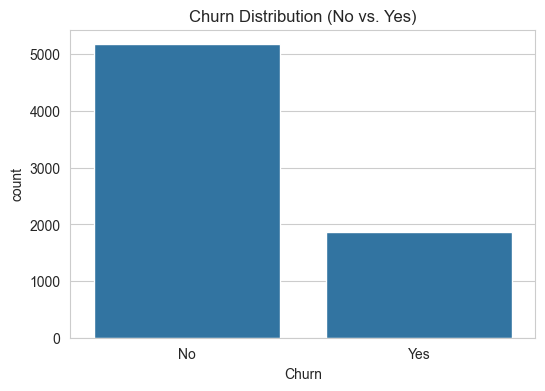

In [6]:
# Set the visual style of the plots
sns.set_style('whitegrid')

# Create a count plot for the 'Churn' column
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution (No vs. Yes)')
plt.show()


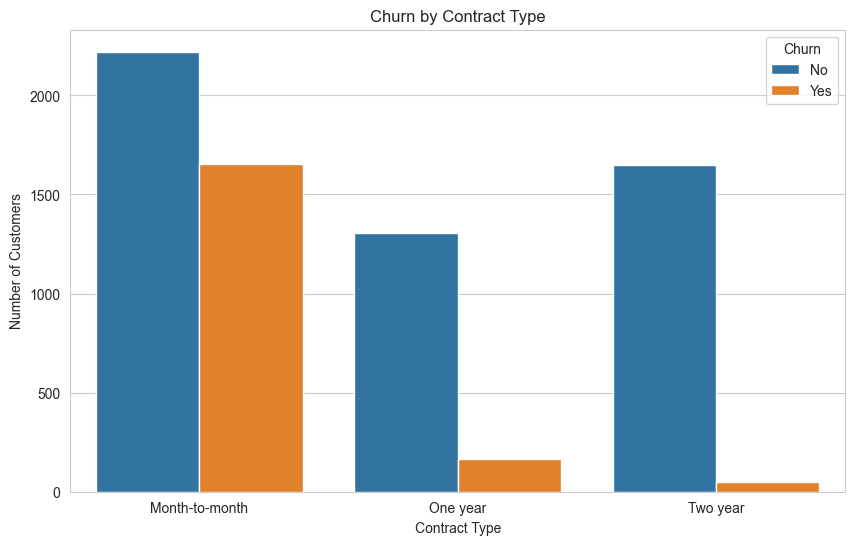

In [7]:
# Visualize churn by contract type
plt.figure(figsize=(10, 6))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.show()

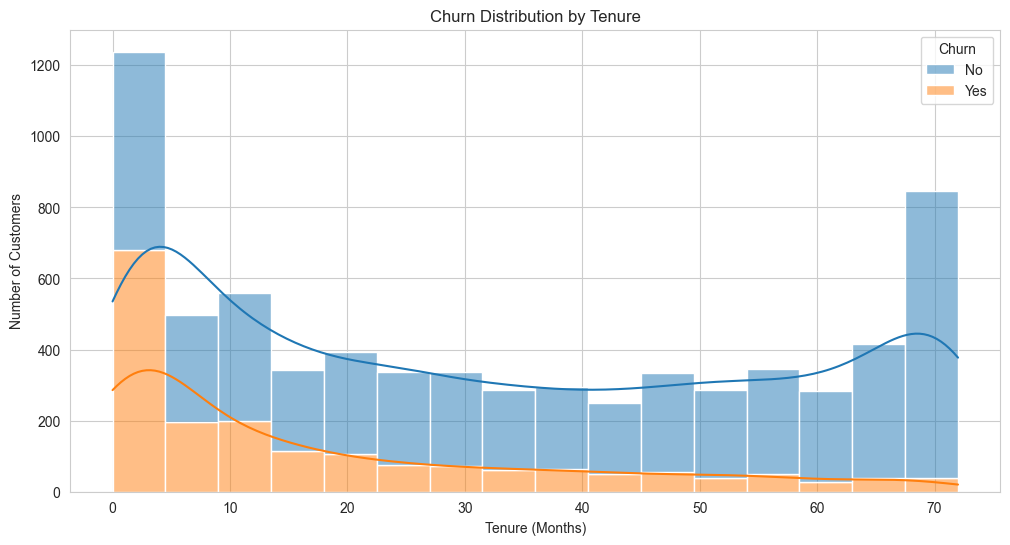

In [8]:
# Visualize churn by tenure
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', kde=True)
plt.title('Churn Distribution by Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Number of Customers')
plt.show()

In [9]:
# Convert 'TotalCharges' to a numeric type. Errors will become NaN.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop the few rows with missing values
df.dropna(inplace=True)

In [10]:
# Drop the customerID column as it is not a useful feature
df = df.drop('customerID', axis=1)

# Convert the 'Churn' column from Yes/No to 1/0
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Convert all other categorical columns into numeric dummy variables
df_dummies = pd.get_dummies(df, drop_first=True)

# Display the first few rows of the new processed DataFrame
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


In [11]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df_dummies.drop('Churn', axis=1)
y = df_dummies['Churn']

# Split the data into training and testing sets (80% train, 20% test)
# stratify=y ensures the churn proportion is the same in both train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [12]:
from sklearn.preprocessing import StandardScaler

# List of numerical columns to scale
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])

# Only transform the test data using the scaler fitted on the training data
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Create and train the logistic regression model
# max_iter is set to a higher value to ensure the model converges
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_log = log_model.predict(X_test)

# Evaluate the model's performance
print("Logistic Regression - Classification Report:")
print(classification_report(y_test, y_pred_log))

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



In [14]:
import xgboost as xgb

# Create and train the XGBoost model
# We add parameters to ensure it's set for a binary classification task
xgb_model = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model's performance
print("XGBoost - Classification Report:")
print(classification_report(y_test, y_pred_xgb))

XGBoost - Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1033
           1       0.59      0.55      0.57       374

    accuracy                           0.78      1407
   macro avg       0.71      0.70      0.71      1407
weighted avg       0.77      0.78      0.78      1407



C:\Users\RAHUL BONEY\customerChurn\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:13:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [15]:
from sklearn.metrics import classification_report
import xgboost as xgb

print("Training XGBoost model... this may take a moment.")

# Create and train the XGBoost model
xgb_model = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model's performance
print("\n--- XGBoost Classification Report ---")
print(classification_report(y_test, y_pred_xgb))

Training XGBoost model... this may take a moment.

--- XGBoost Classification Report ---
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1033
           1       0.59      0.55      0.57       374

    accuracy                           0.78      1407
   macro avg       0.71      0.70      0.71      1407
weighted avg       0.77      0.78      0.78      1407



C:\Users\RAHUL BONEY\customerChurn\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:13:43] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


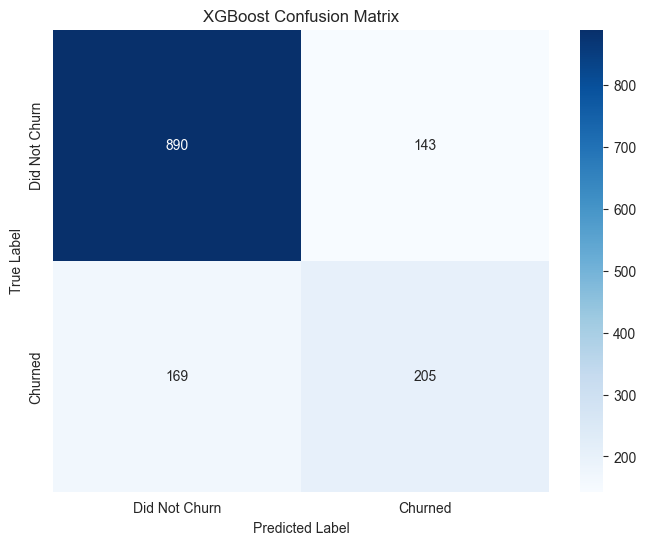

In [16]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Did Not Churn', 'Churned'], yticklabels=['Did Not Churn', 'Churned'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('XGBoost Confusion Matrix')
plt.show()

XGBoost AUC Score: 0.8197


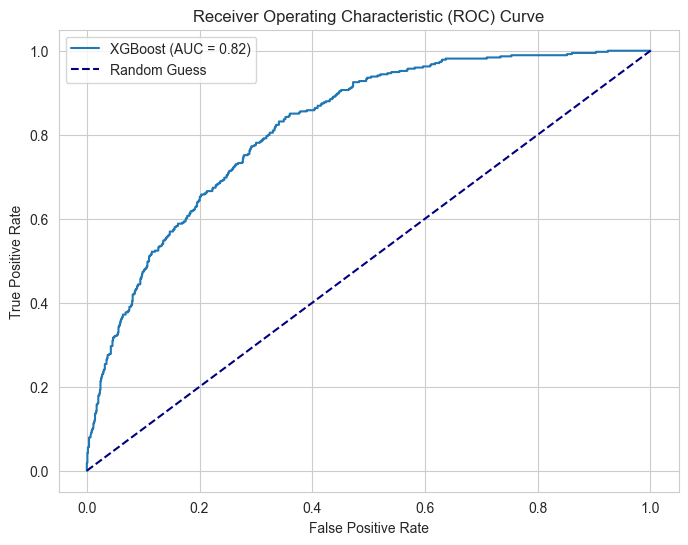

In [17]:
# Get prediction probabilities for the positive class (Churn)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# Calculate the AUC score
auc = roc_auc_score(y_test, y_pred_proba)
print(f'XGBoost AUC Score: {auc:.4f}')

# Calculate the ROC curve points
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

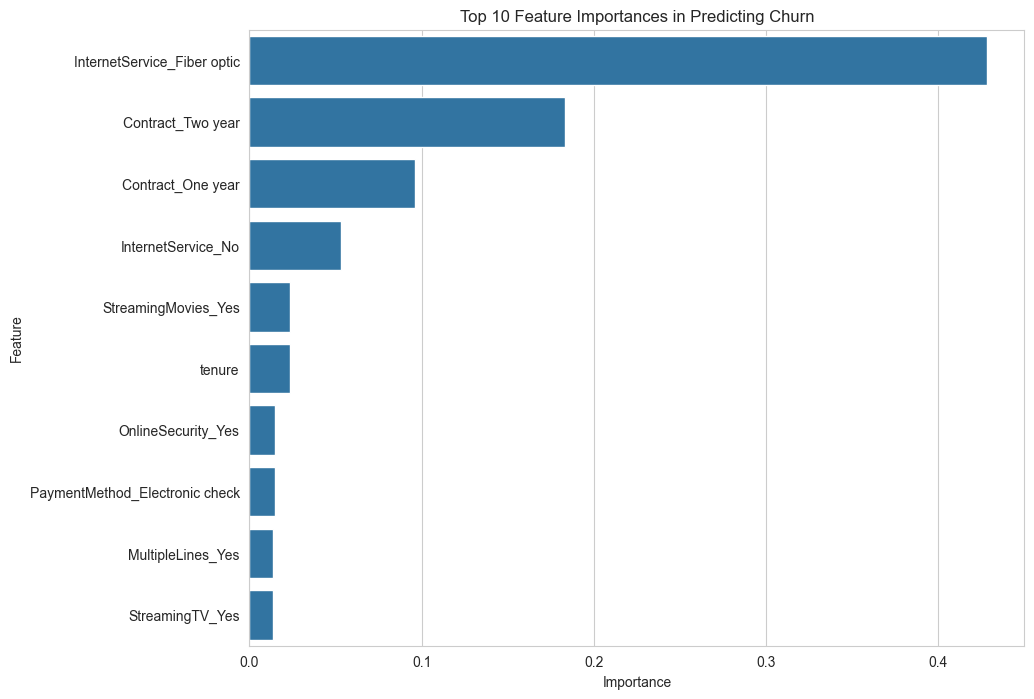

In [18]:
# Create a DataFrame for feature importances
importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values('Importance', ascending=False)

# Plot the top 10 most important features
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importances.head(10))
plt.title('Top 10 Feature Importances in Predicting Churn')
plt.show()